# This is a notebook for module 2 - ML

## 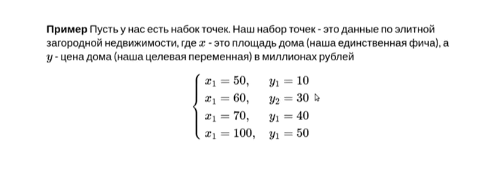

In [72]:
import pandas as pd
import numpy as np
from sympy import * 
from matplotlib import pyplot as plt

In [73]:
area = np.array([50, 60, 70, 100])
prices = np.array([10, 30, 40, 50])
X = np.array([
             [1, 50],
             [1, 60],
             [1, 70],
             [1, 100]])
df = pd.DataFrame({'area': area, 'price': prices})
df

,area,price
0,50,10
1,60,30
2,70,40
3,100,50


In [74]:
X

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [75]:
# wake up vector Y - prices
Y = prices
Y

array([10, 30, 40, 50])

In [83]:
# multiplay matrix in numpy
X_T_X = X.T.dot(X)
# find inverted matrix in numpy
X_T_X_inverted = np.linalg.inv(X_T_X)
X_T_X_inverted
w1, w2  = X_T_X_inverted.dot(X.T).dot(Y)
w1, w2

(-17.499999999999957, 0.7142857142857137)

0.714285714285714*x0 + 17.5*x1

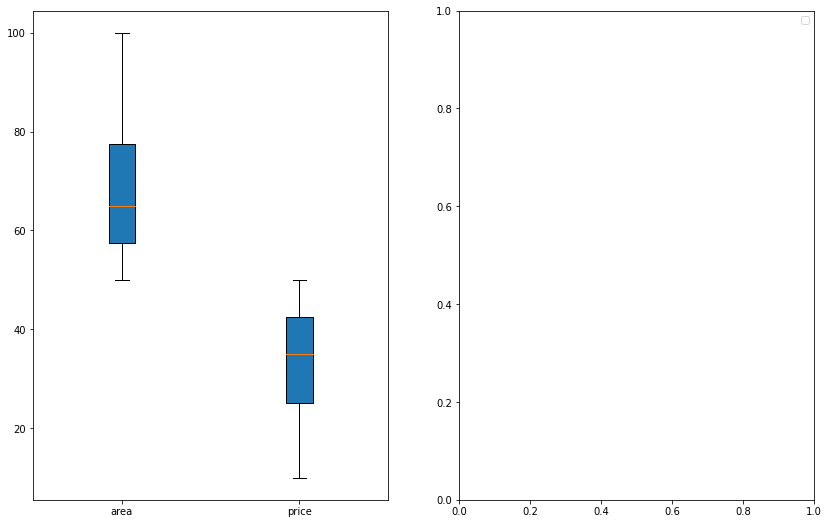

In [43]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))
box_plot1 = ax1.boxplot([df['area'], df['price']],
                        vert=True,
                        patch_artist=True,
                        labels=['area', 'price'])
plt.legend('Boxplot for feater Area and price')

In [11]:
df['area']

0     50
1     60
2     70
3    100
Name: area, dtype: int64

<AxesSubplot:>

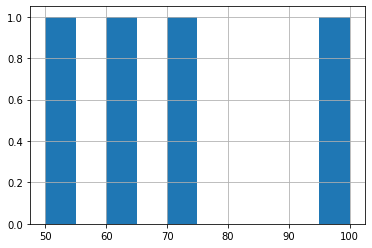

In [14]:
df['area'].hist()

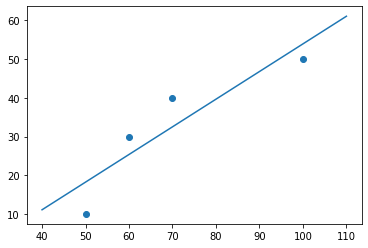

In [92]:
# visulation our features
plt.scatter(df['area'], df['price'])

margin = 10
X_min = X[:, 1].min()-margin
X_max = X[:, 1].max()+margin
X_support = np.linspace(X_min, X_max, num=100)

Y_model = w1 + w2 * X_support

plt.plot(X_support, Y_model)
plt.show()

In [97]:
x1, x0  = symbols('x1, x0')
yf = w1 * x0 + w2 * x1
yf

-17.5*x0 + 0.714285714285714*x1

In [2]:
from sklearn.datasets import load_boston

In [3]:
data_boston = load_boston()
features = data_boston.data
y = data_boston.target

/home/stynic/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [4]:
features.shape

(506, 13)

In [5]:
y.shape

(506,)

In [6]:
def ndprint(a, format_string ='{0:.2f}'):
    """Функция, которая распечатывает список в красивом виде"""
    return [format_string.format(v,i) for i,v in enumerate(a)]

In [7]:
from numpy.linalg import inv

# вычисляем к-ты линейной регрессии
w_analytic = inv(
    features.T.dot(features)
).dot(
    features.T
).dot(
    y
)
print(f"Аналитически определённые коэффициенты \n{ndprint(w_analytic)}")

Аналитически определённые коэффициенты 
['-0.09', '0.05', '-0.00', '2.85', '-2.87', '5.93', '-0.01', '-0.97', '0.17', '-0.01', '-0.39', '0.01', '-0.42']


In [8]:
from sklearn.linear_model import LinearRegression

# обучаем модель "из коробки"
reg = LinearRegression().fit(features, y)
print(f"Коэффициенты, вычисленные моделью sklearn \n {ndprint(reg.coef_)}")

Коэффициенты, вычисленные моделью sklearn 
 ['-0.11', '0.05', '0.02', '2.69', '-17.77', '3.81', '0.00', '-1.48', '0.31', '-0.01', '-0.95', '0.01', '-0.52']


## homework for lesson 5 

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

In [12]:
y_hw = np.array([10, 15, 40, 45])

features = np.array([[1, 50],
                 [1, 60],
                 [1, 70],
                 [1, 100]])

In [13]:
features.shape

(4, 2)

In [189]:
w_analytic = inv(
    features.T.dot(features)
).dot(
    features.T
).dot(
    y_hw
)
w_analytic

array([-22.5       ,   0.71428571])

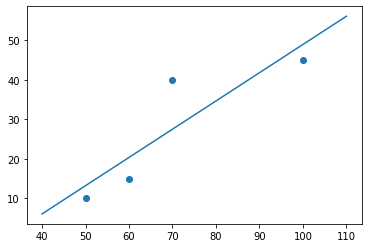

In [190]:
margin = 10
X_min = X[:, 1].min()-margin
X_max = X[:, 1].max()+margin
X_support = np.linspace(X_min, X_max, num=100)

Y_model = w_analytic[0] + w_analytic[1] * X_support
plt.scatter(X[:, 1], y_hw)
plt.plot(X_support, Y_model)

In [33]:
data_boston = load_boston()
features = data_boston.data
y = data_boston.target

/home/stynic/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# обучаем модель "из коробки"
reg = LinearRegression().fit(features, y)
y_pred = reg.predict(features) # predictate values
y_true = y # true values

In [43]:
 print(f'MAE = {mean_absolute_error(y_true, y_pred)}')

MAE = 3.270862810900316


In [44]:
 print(f'RMSE = {np.sqrt(mean_squared_error(y_true, y_pred))}')

RMSE = 4.679191295697281


In [49]:
#coefficient determination
print(f'R2_score = {r2_score(y_true, y_pred)}')

R2_score = 0.7406426641094095


In [50]:
# coefficient correlation 
np.sqrt(0.7406426641094095)

0.8606059865637756

## Homework 3.7
У вас есть два набора точек – истинные значения *y_true* и предсказанные значения *y_pred*

* для каждой точки из *y_true* постройте величину ошибки $e = y-\hat{y}$ – это называется **остатки регрессии**
* возведите ошибки в квадрат $e^2$
* постройте график ошибок – зависимость $e^2$ от $e$

In [89]:
import numpy as np

y_pred_ = np.array([30.0, 25.03, 30.57, 28.61, 27.94, 25.26, 23.0, 19.54, 11.52, 18.92, 19.0, 21.59, 20.91, 19.55, 19.28, 19.3, 20.53, 16.91, 16.18, 18.41, 12.52, 17.67, 15.83, 13.81, 15.68, 13.39, 15.46, 14.71, 19.55, 20.88, 11.46, 18.06, 8.81, 14.28, 13.71, 23.81, 22.34, 23.11, 22.92, 31.36])
y_true_ = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8])

In [90]:
from matplotlib import pyplot as plt

In [91]:
e = (y_true_ - y_pred_)
e2 = e**2

array([<matplotlib.lines.Line2D object at 0x7fdb6613c3a0>], dtype=object)

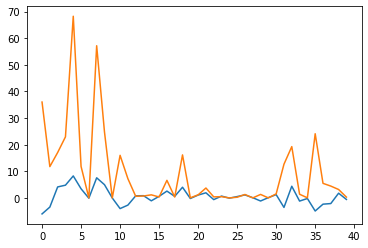

In [92]:
np.sort(plt.plot(e))
np.sort(plt.plot(e2))

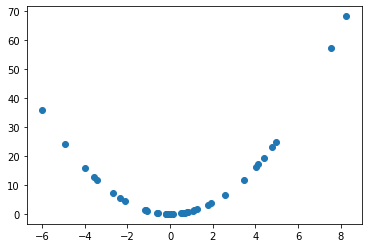

In [93]:
plt.scatter(e, e2)

(array([ 2.,  3.,  3.,  5., 14.,  4.,  2.,  5.,  0.,  2.]),
 array([-6.   , -4.574, -3.148, -1.722, -0.296,  1.13 ,  2.556,  3.982,
         5.408,  6.834,  8.26 ]),
 <BarContainer object of 10 artists>)

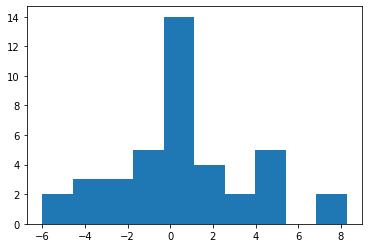

In [96]:
plt.hist(e)

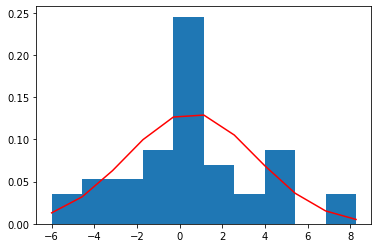

In [101]:
sigma = e.std()
mu = e.mean()
count, bins, _ = plt.hist(e, density=True)
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
plt.plot(bins, p_x, color='r')

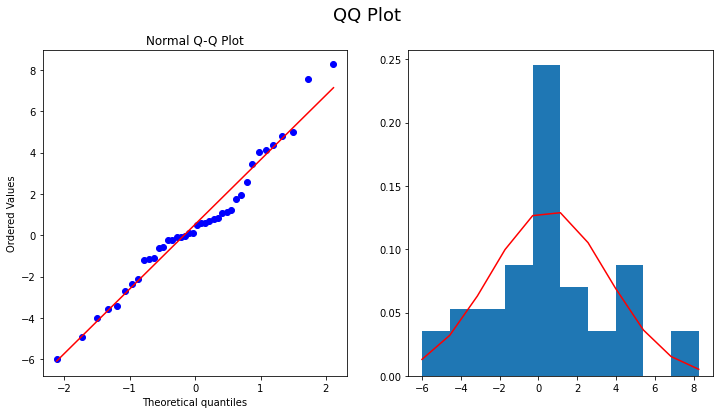

In [106]:
import scipy.stats as stats
sigma = e.std()
mu = e.mean()

plt.rcParams['figure.figsize'] = [12, 6]
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('QQ Plot', fontsize=18)

# Q-Q Plot graph
stats.probplot(e, dist="norm", plot=ax1)
ax1.set_title("Normal Q-Q Plot")

# normal distribution histogram + distribution
count, bins, _ = ax2.hist(e, density=True)
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
ax2.plot(bins, p_x, color='r')

## homework 9 

Даны точки $x$ и значения в этих точках $y$. Нормализуйте $y$ с помощью *z-score* и постройте график зависимости нормализованных значений от $x$. Для графика используйте `.scatter(x,y_tansformed)`

In [121]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

x = np.linspace(1,10,num=10).reshape(-1, 1)
y = np.array(
    [1.,  3.,  4.,  2., 10.,  5.,  5.,  2.,  5., 10.],
    dtype=np.float32
)


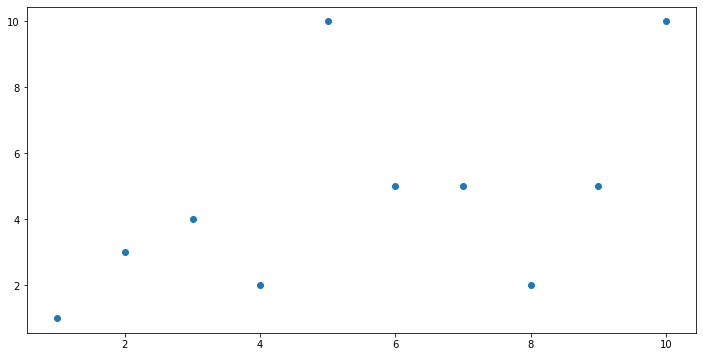

In [122]:

plt.scatter(x, y)

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

RMSE = 2.531737934640347


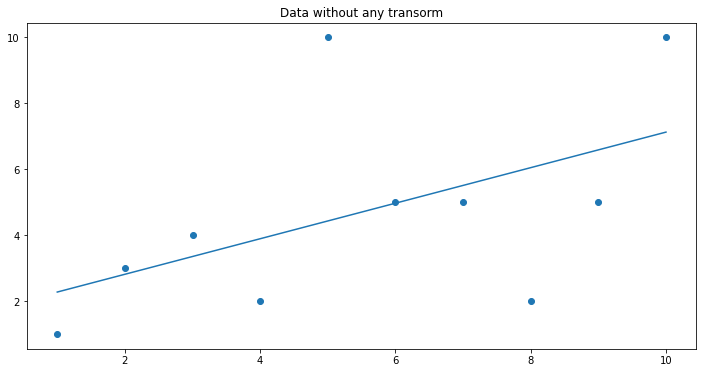

In [149]:
# withount transform our data
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred)
plt.title('Data without any transorm')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')

RMSE = 0.5634954086779775


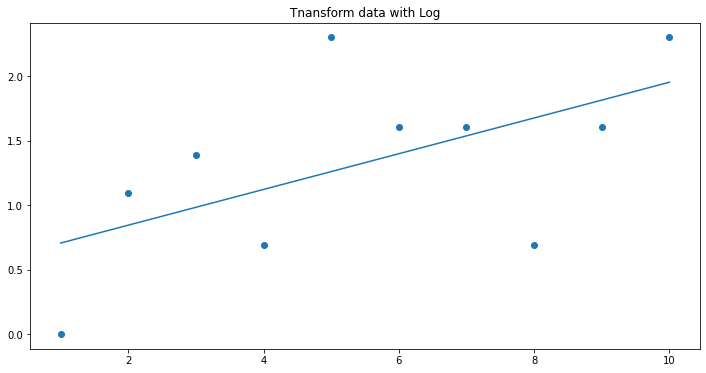

In [162]:
# first transform log for Y
y_trasform = np.log(y)
y_trasform

reg = LinearRegression().fit(x, y_trasform)
y_pred = reg.predict(x)

plt.scatter(x, y_trasform)
plt.plot(x, y_pred)
plt.title('Tnansform data with Log')
print(f'RMSE = {np.sqrt(mean_squared_error(y_trasform, y_pred))}')

RMSE = 0.5637522348304665


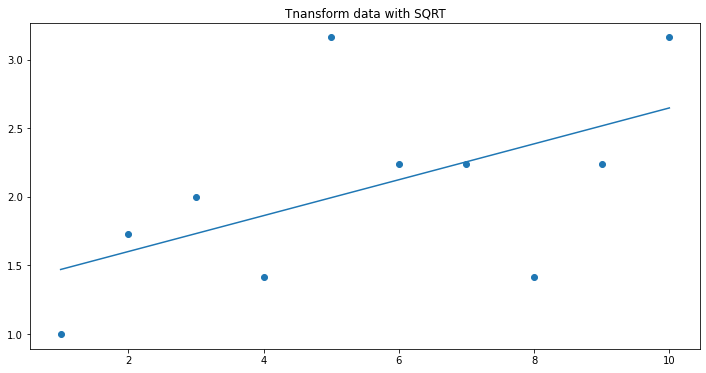

In [163]:
# second transform sqrt for Y
y_trasform = np.sqrt(y)
y_trasform

reg = LinearRegression().fit(x, y_trasform)
y_pred = reg.predict(x)

plt.scatter(x, y_trasform)
plt.plot(x, y_pred)
plt.title('Tnansform data with SQRT')
print(f'RMSE = {np.sqrt(mean_squared_error(y_trasform, y_pred))}')

RMSE = 1.5895974606912447e-16


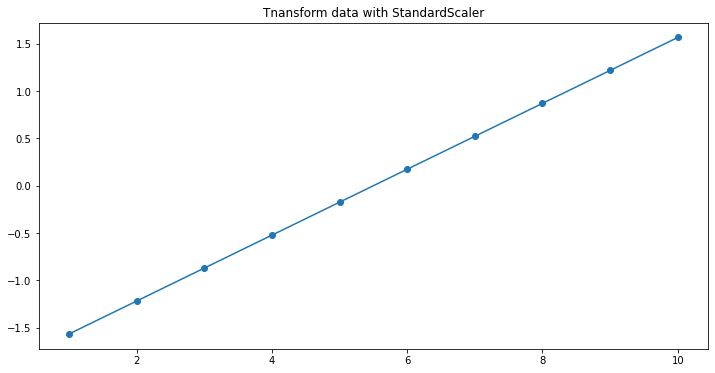

In [164]:
# trird transform Stardard scaler for Y
from sklearn.preprocessing import StandardScaler

y_trasform = StandardScaler().fit_transform(x, y)

reg = LinearRegression().fit(x, y_trasform)
y_pred = reg.predict(x)

plt.scatter(x, y_trasform)
plt.plot(x, y_pred)
plt.title('Tnansform data with StandardScaler')
print(f'RMSE = {np.sqrt(mean_squared_error(y_trasform, y_pred))}')

RMSE = 7.23776861244768e-17


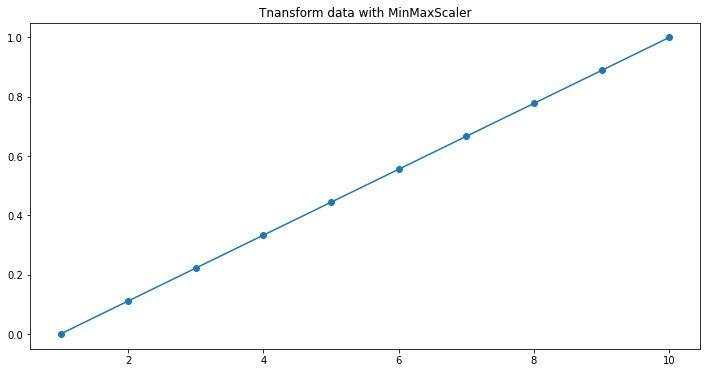

In [165]:
# one transform MinMaxScaler for Y
from sklearn.preprocessing import MinMaxScaler

y_trasform = MinMaxScaler().fit_transform(x, y)

reg = LinearRegression().fit(x, y_trasform)
y_pred = reg.predict(x)

plt.scatter(x, y_trasform)
plt.plot(x, y_pred)
plt.title('Tnansform data with MinMaxScaler')
print(f'RMSE = {np.sqrt(mean_squared_error(y_trasform, y_pred))}')